# Clustering Project

## Setup

In [18]:
import polars as pl
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import product

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors


In [19]:
CMAP = sns.diverging_palette(230, 20, n=24)

## Data loading

In [20]:
df_country = pl.read_csv("../data/Country-data.csv")


In [21]:
df_country.describe()

describe,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""167""",167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,38.27006,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
"""std""",null,40.328931,27.41201,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
"""min""","""Afghanistan""",2.6,0.109,1.81,0.0659,609.0,-4.21,32.1,1.15,231.0
"""25%""",null,7.9,23.8,4.91,30.0,3340.0,1.77,65.3,1.79,1310.0
"""50%""",null,19.3,35.0,6.32,43.3,9960.0,5.39,73.1,2.41,4660.0
"""75%""",null,62.2,51.4,8.65,58.9,22900.0,10.9,76.8,3.91,14600.0
"""max""","""Zambia""",208.0,200.0,17.9,174.0,125000.0,104.0,82.8,7.49,105000.0


In [22]:
df_country.null_count()

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


In [23]:
df_country.is_duplicated().sum()

0

/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  pos

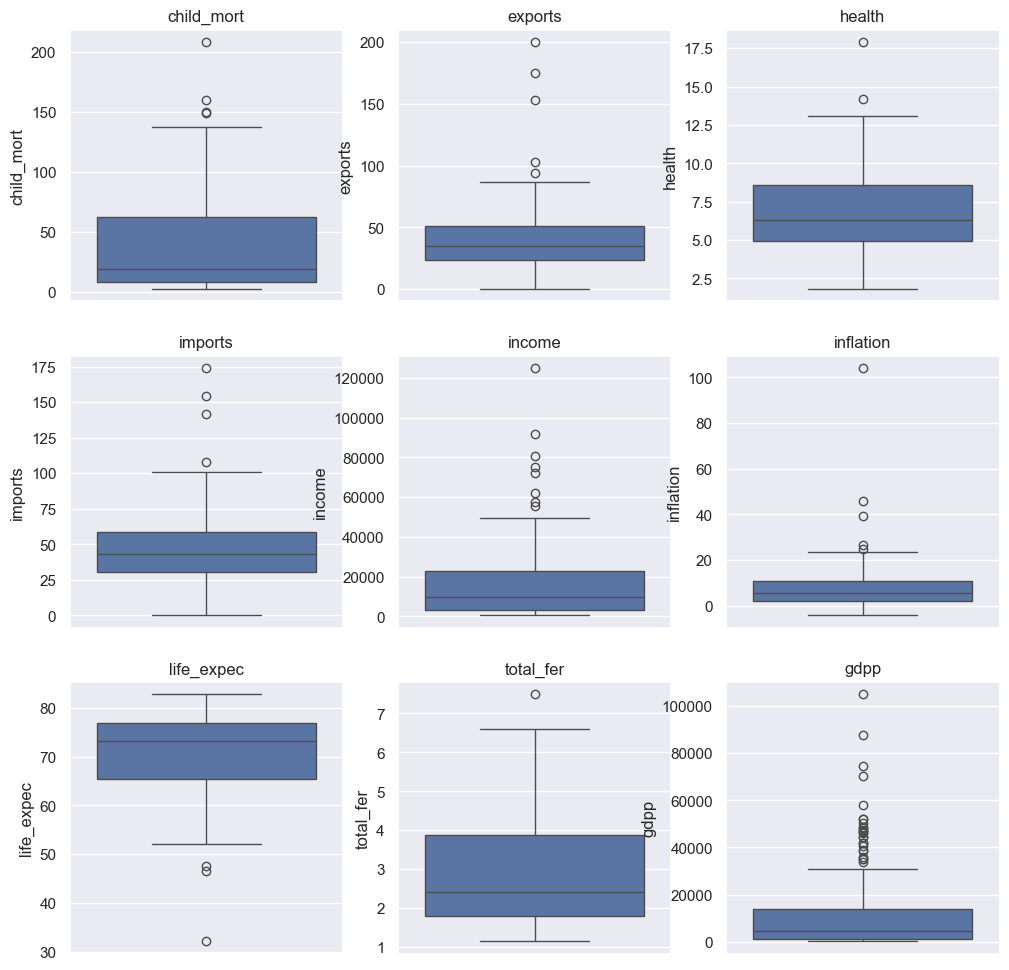

In [24]:
num_cols = df_country.select(pl.col(pl.NUMERIC_DTYPES)).columns
n_cols = len(num_cols)
# Create a plot with n subplots, where n is the number of numeric columns
fig, axes = plt.subplots(
    nrows=math.ceil(len(num_cols) / 3), ncols=3, figsize=(12,12), sharex=True
)

# Iterate over the columns and create a subplot for each one
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_country, y=col, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)
plt.show()

/var/folders/lj/b6nh4d2n3_b608c7t9s86ybc0000gn/T/ipykernel_14272/4258087631.py:2: UserWarning: The palette list has more values (24) than needed (9), which may not be intended.
  sns.boxplot(df_country.to_pandas(), palette=CMAP, log_scale=False)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you w

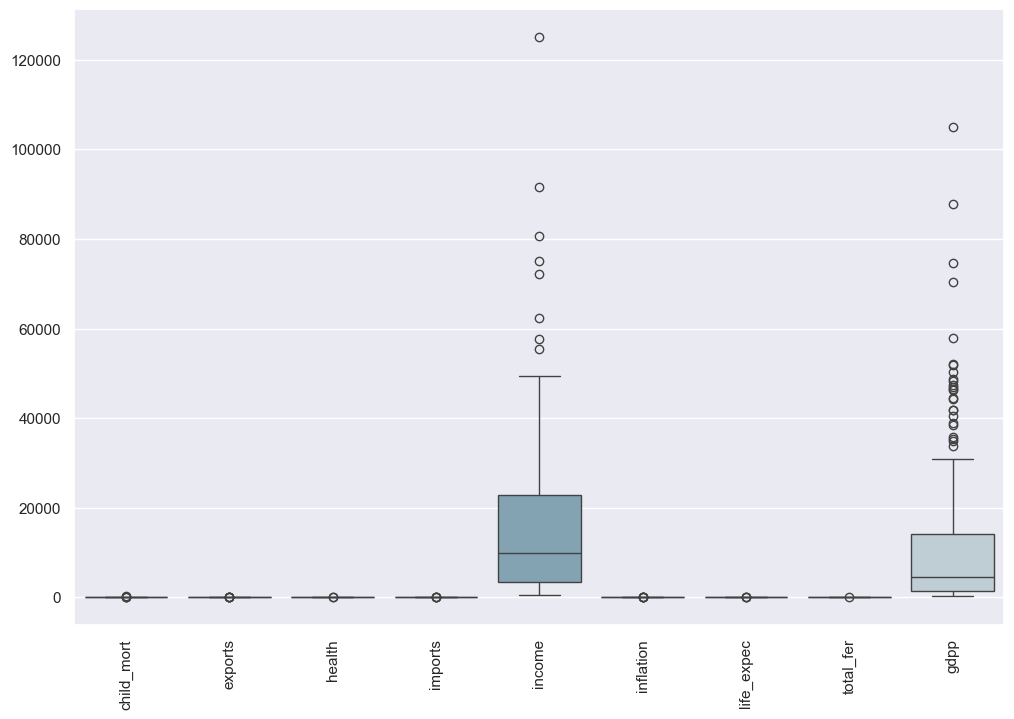

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_country.to_pandas(), palette=CMAP, log_scale=False)
plt.xticks(rotation=90)
plt.show()

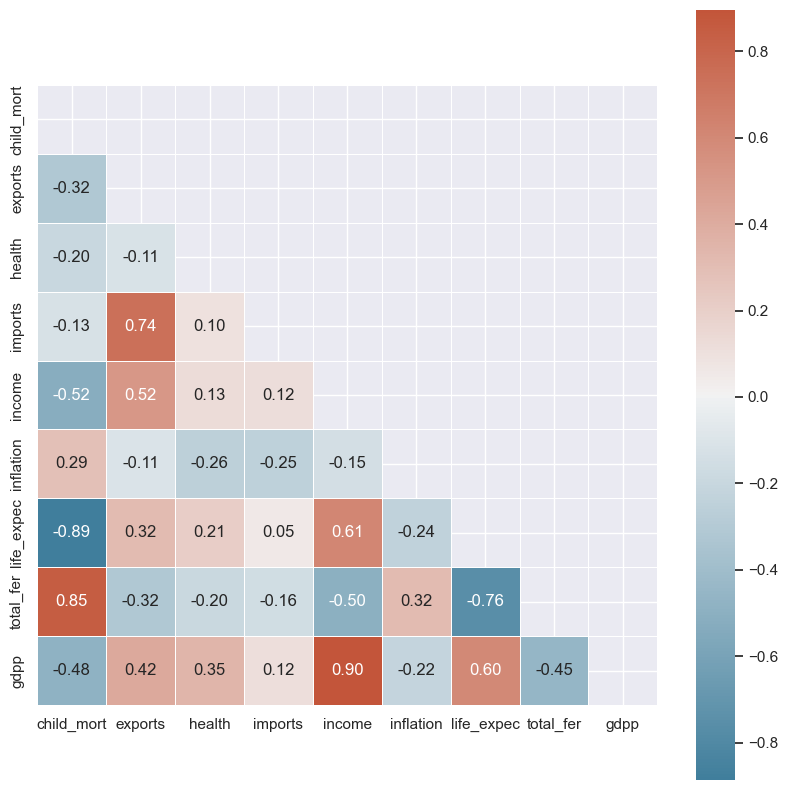

In [26]:
df_feats = df_country.drop(columns=["country"])
corr = df_feats.to_pandas().corr()
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    annot=True,
    mask=corr_mask,
    fmt=".2f",
    square=True,
    linewidths=0.5,
)
plt.show()

## Scale the data

In [27]:
scaler = StandardScaler()
country_scaled = scaler.fit_transform(df_country.drop("country").to_numpy())
# Create a new dataframe to display the names of the columns
df_country_scaled = pl.DataFrame(
    country_scaled, schema=df_country.drop("country").columns
)

/var/folders/lj/b6nh4d2n3_b608c7t9s86ybc0000gn/T/ipykernel_14272/2410641110.py:2: UserWarning: The palette list has more values (24) than needed (9), which may not be intended.
  sns.boxplot(
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

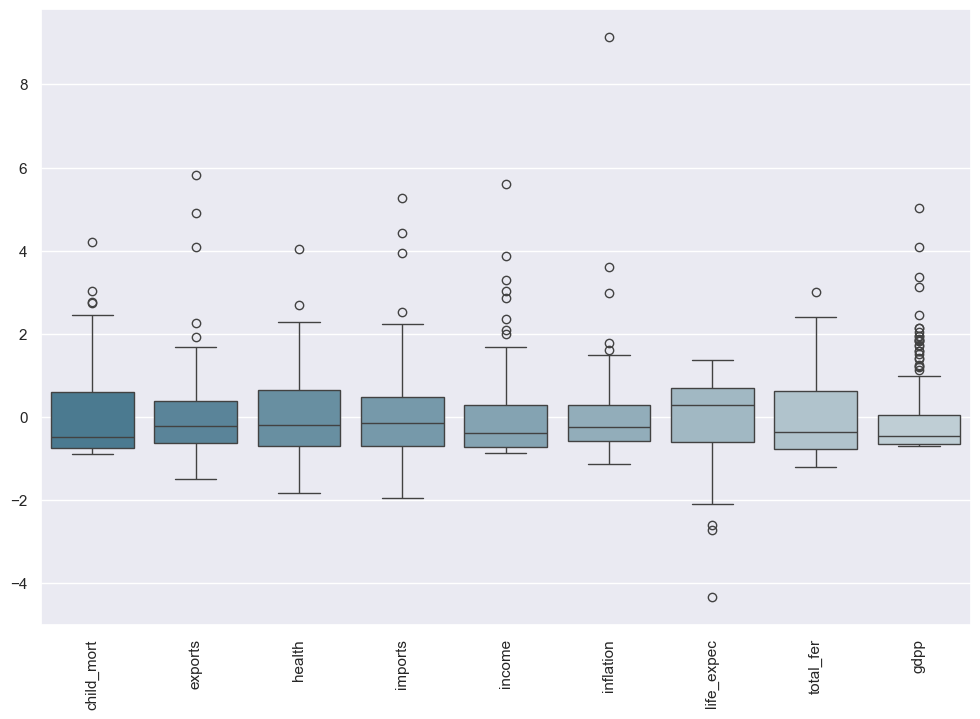

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    df_country_scaled.to_pandas(),
    palette=CMAP,
    log_scale=False,
)
plt.xticks(rotation=90)
plt.show()

## PCA for clustering

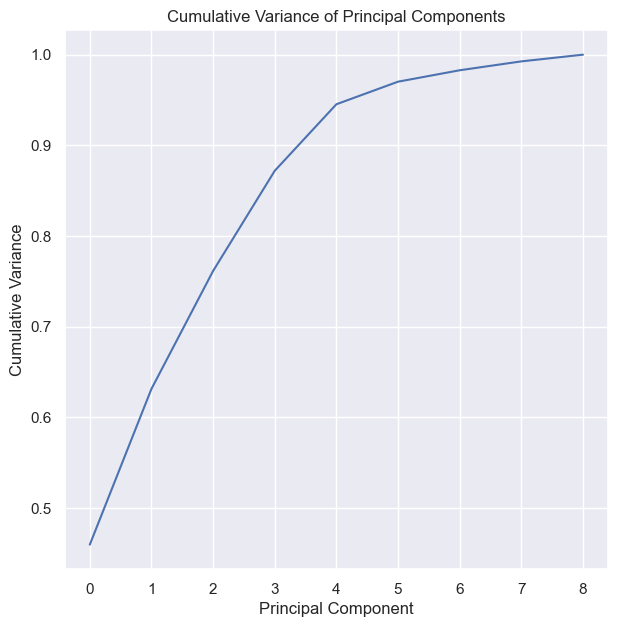

In [29]:
pca = PCA()
pca_data_scaled = pca.fit_transform(country_scaled)
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var).round(4)
plt.figure(figsize=(7, 7))
sns.lineplot(data=cum_var, markers=True)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance of Principal Components')
plt.show()

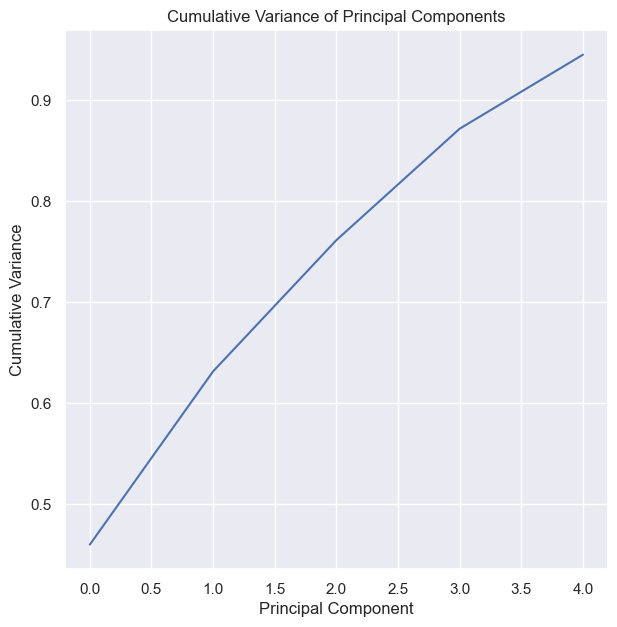

In [30]:
pca = PCA(n_components=5)
pca_data_scaled = pca.fit_transform(country_scaled)
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var).round(4)
plt.figure(figsize=(7, 7))
sns.lineplot(data=cum_var, markers=True)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance")
plt.title("Cumulative Variance of Principal Components")
plt.show()

## KMeans

### With PCA

In [31]:
sum_squared_distances = []
silhouette_scores = []
k = range(2, 10)

for _ in k:
    kmeans = KMeans(n_clusters=_, random_state=1992)
    y = kmeans.fit_predict(pca_data_scaled)
    sum_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_scaled, y))

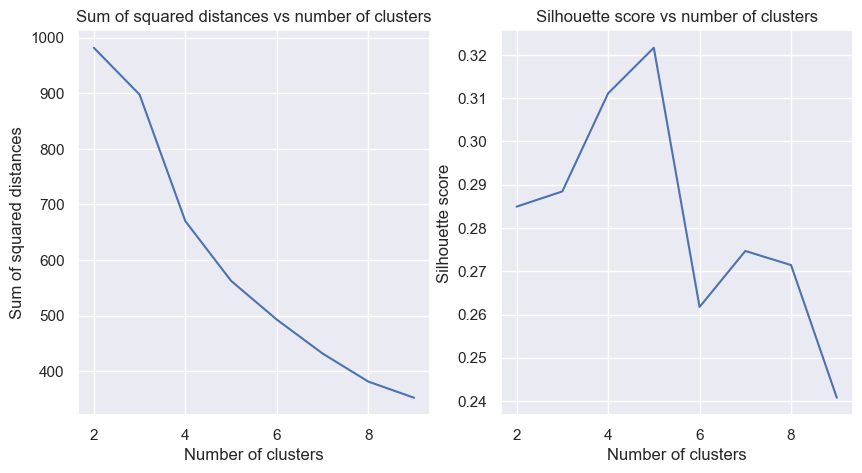

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=k, y=sum_squared_distances, ax=ax[0])
ax[0].set_title("Sum of squared distances vs number of clusters")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Sum of squared distances")

sns.lineplot(x=k, y=silhouette_scores, ax=ax[1])
ax[1].set_title("Silhouette score vs number of clusters")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Silhouette score")

plt.show()


In [33]:
kmeans = KMeans(n_clusters=5, random_state=1992)
y = kmeans.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y))
df_country = df_country.with_columns(pl.Series(values=y, name="kmeans"))

0.32166505897941206


### Without PCA

In [34]:
sum_squared_distances = []
silhouette_scores = []
k = range(2, 10)

for _ in k:
    kmeans = KMeans(n_clusters=_, random_state=1992)
    y = kmeans.fit_predict(df_country_scaled)
    sum_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_scaled, y))

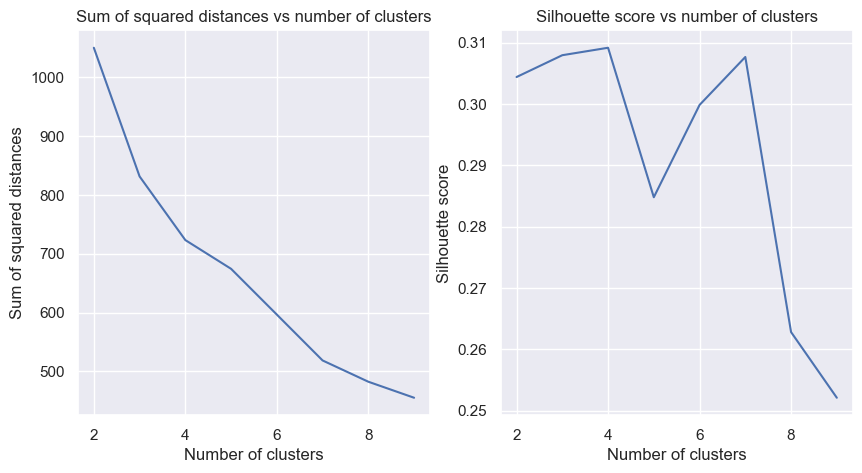

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=k, y=sum_squared_distances, ax=ax[0])
ax[0].set_title("Sum of squared distances vs number of clusters")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Sum of squared distances")

sns.lineplot(x=k, y=silhouette_scores, ax=ax[1])
ax[1].set_title("Silhouette score vs number of clusters")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Silhouette score")

plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, random_state=1992)
y = kmeans.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))

0.28305813477094693


## Hierarchical Clustering

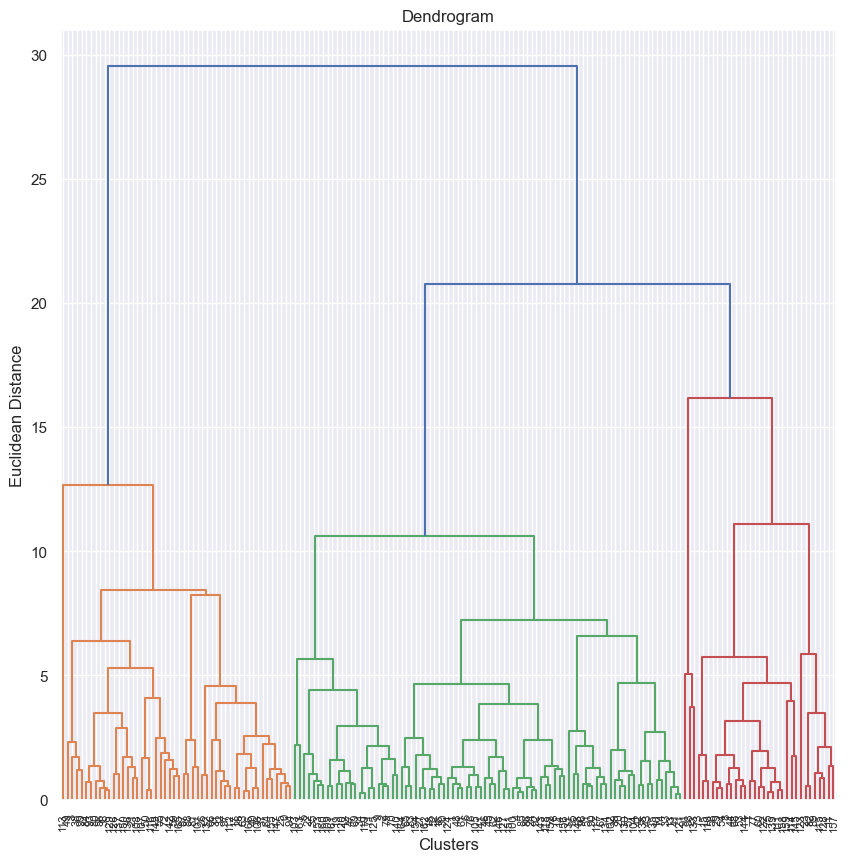

In [37]:
plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(
    linkage(pca_data_scaled, method="ward"), leaf_rotation=90, leaf_font_size=8
)
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distance")
plt.show()

In [38]:
agglomerative_clusterer = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
y_hc = agglomerative_clusterer.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y_hc))
df_country = df_country.with_columns(pl.Series(values=y_hc, name='hc_cluster'))

0.3292429420125382


In [39]:
agglomerative_clusterer = AgglomerativeClustering(
    n_clusters=3, linkage="ward", metric="euclidean"
)
y_hc = agglomerative_clusterer.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))

0.24563001303300647


## DBSCAN

### DBScan with PCA

In [40]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_scaled)
distances, indices = neighbors_fit.kneighbors(pca_data_scaled)

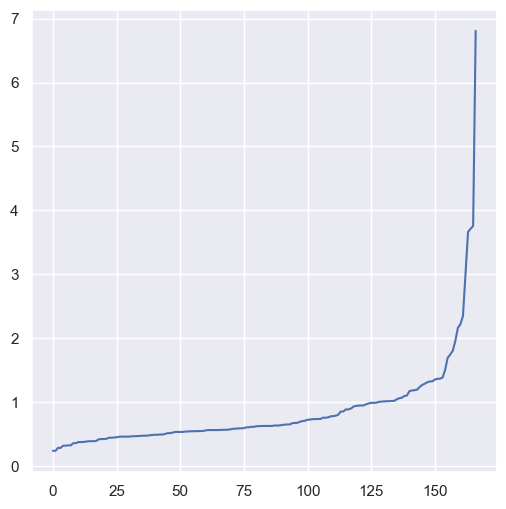

In [41]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.figure(figsize=(6, 6))
plt.plot(distances)

In [42]:
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples = np.arange(3, 12)

dbscan_params = list(product(eps_values, min_samples))
n_clusters = []
sil_score = []

for params in dbscan_params:
    y_dbscan = DBSCAN(eps=params[0], min_samples=params[1]).fit_predict(pca_data_scaled)
    try:
        sil_score.append(silhouette_score(pca_data_scaled, y_dbscan))
    except:
        sil_score.append(0)
    n_clusters.append(len(np.unique(y_dbscan)))

In [43]:
df_param_tunning = pl.from_records(
    dbscan_params, schema=["epsilon", "min_samples"]
).with_columns(
    pl.Series(values=sil_score, name="sil_score", dtype=pl.Float64),
    pl.Series(values=n_clusters, name="n_clusters", dtype=pl.Int64),
)

In [44]:
df_param_tunning

epsilon,min_samples,sil_score,n_clusters
f64,i64,f64,i64
0.1,3,0.0,1
0.1,4,0.0,1
0.1,5,0.0,1
0.1,6,0.0,1
0.1,7,0.0,1
0.1,8,0.0,1
0.1,9,0.0,1
0.1,10,0.0,1
0.1,11,0.0,1


In [45]:
pivot_1 = pd.pivot_table(
    df_param_tunning.to_pandas(),
    index="min_samples",
    columns="epsilon",
    values="sil_score",
)
pivot_2 = pd.pivot_table(
    df_param_tunning.to_pandas(),
    index="min_samples",
    columns="epsilon",
    values="n_clusters",
)

Text(92.25, 0.5, 'min_samples')

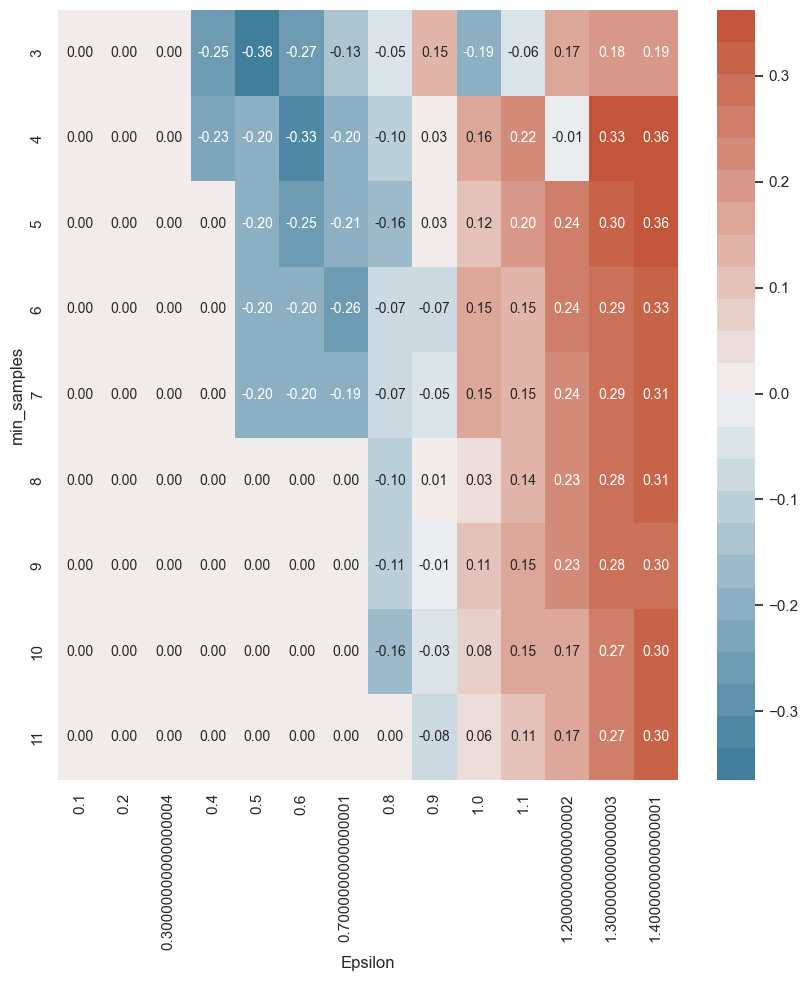

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_1, annot=True, cmap=CMAP, fmt=".2f", annot_kws={"size": 10})
plt.xlabel("Epsilon")
plt.ylabel("min_samples")

Text(92.25, 0.5, 'min_samples')

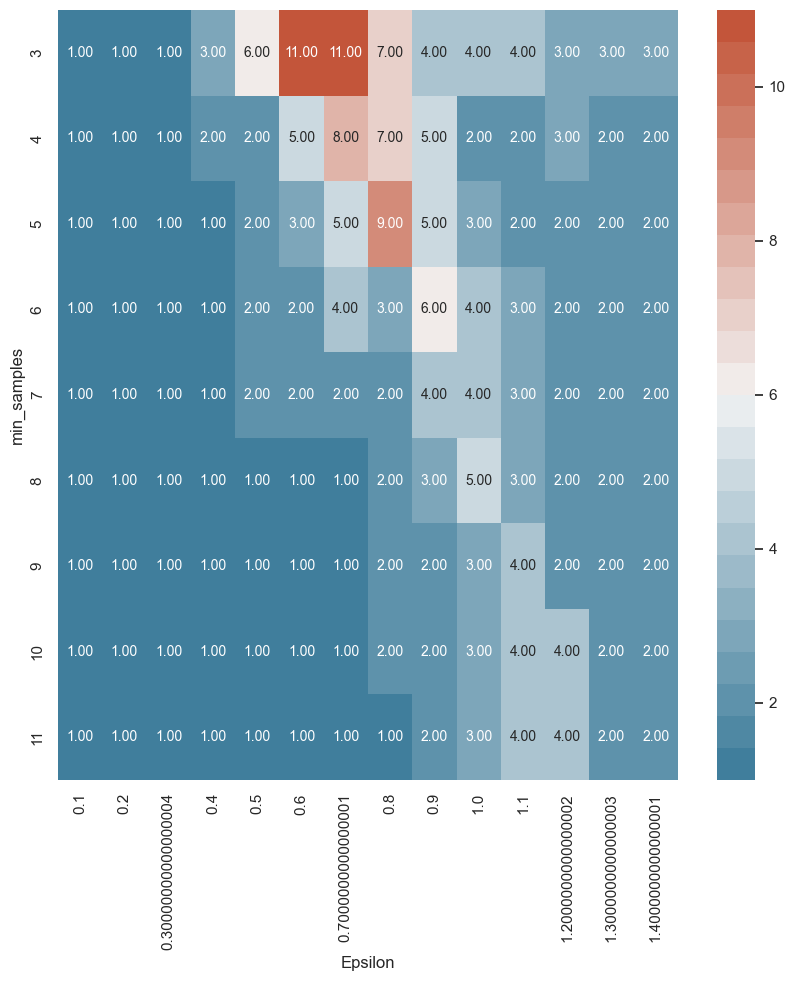

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_2, annot=True, cmap=CMAP, fmt=".2f", annot_kws={"size": 10})
plt.xlabel("Epsilon")
plt.ylabel("min_samples")

In [48]:
y_dbscan = DBSCAN(eps=1.0, min_samples=4).fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y_dbscan))
df_country = df_country.with_columns(pl.Series(values=y_dbscan, name='y_dbscan'))

0.16312297958337502


### DBSCAN without PCA

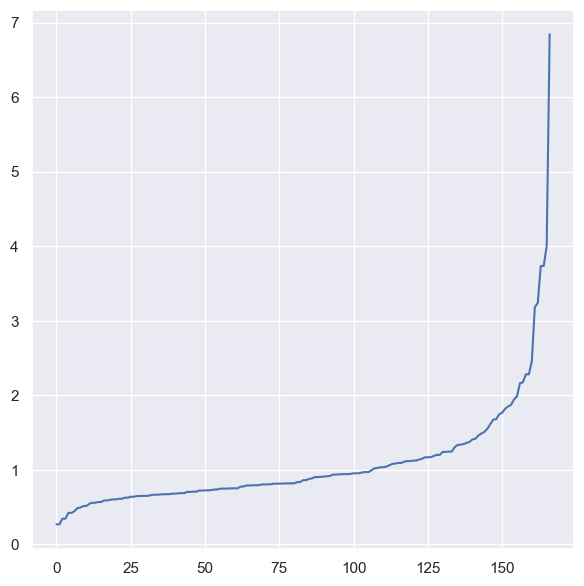

In [49]:
neighbors = NearestNeighbors(n_neighbors=2).fit(df_country_scaled)
distances, indices = neighbors.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
fig = plt.figure(figsize=(7, 7))
plt.plot(distances)

In [50]:
eps_values = np.arange(1.0, 3.0, 0.1)
min_samples = np.arange(3, 12)



In [51]:
dbscan_params = list(product(eps_values, min_samples))
n_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_scores.append(silhouette_score(df_country_scaled, y_dbscan))
    except Exception as e:
        sil_score.append(0)
    n_clusters.append(len(np.unique(y_dbscan)))

In [52]:
df_param_tunning = pl.from_records(
    dbscan_params, schema=["epsilon", "min_samples"]
).with_columns(
    [
        pl.Series(values=sil_scores, name="sil_scores"),
        pl.Series(values=n_clusters, name="n_clusters"),
    ]
)

In [53]:
pivot_1 = pd.pivot_table(
    df_param_tunning.to_pandas(),
    index="min_samples",
    columns="epsilon",
    values="sil_scores",
)
pivot_2 = pd.pivot_table(
    df_param_tunning.to_pandas(),
    index="min_samples",
    columns="epsilon",
    values="n_clusters",
)

Text(92.25, 0.5, 'min_samples')

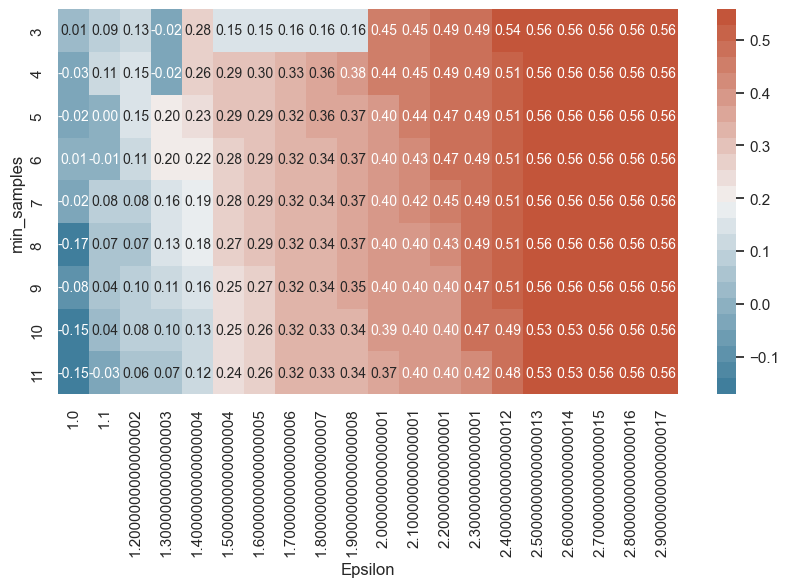

In [54]:
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_1, annot=True, cmap=CMAP, fmt=".2f", annot_kws={"size": 10})
plt.xlabel("Epsilon")
plt.ylabel("min_samples")

Text(92.25, 0.5, 'min_samples')

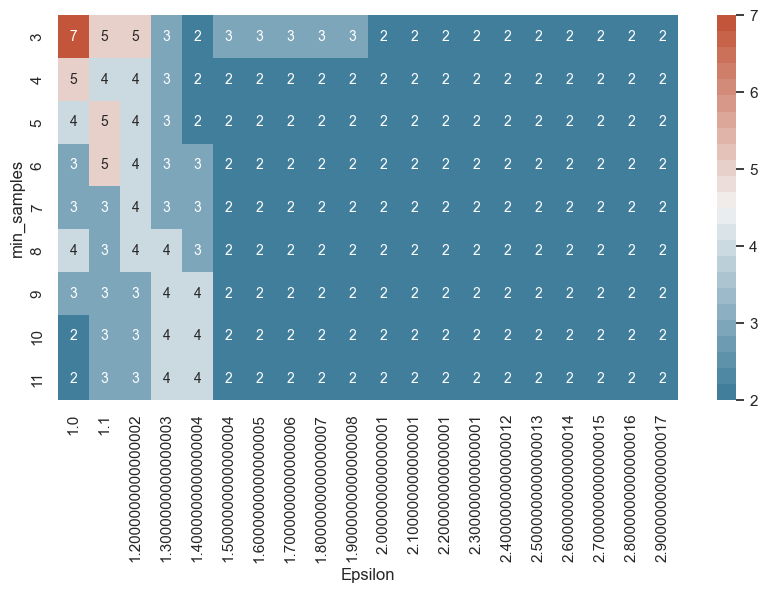

In [55]:
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_2, annot=True, cmap=CMAP, annot_kws={"size": 10})
plt.xlabel("Epsilon")
plt.ylabel("min_samples")

#### Train the model

In [56]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(f"Silouette Score: {silhouette_score(df_country_scaled, y_dbscan)}")
df_country = df_country.with_columns(pl.Series(values=y_dbscan, name="dbscan_without_pca"))

Silouette Score: 0.1563549566374231


In [57]:
df_country.head()

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hc_cluster,y_dbscan,dbscan_without_pca
str,f64,f64,f64,f64,i64,f64,f64,f64,i64,i32,i64,i64,i64
"""Afghanistan""",90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,1,0,0
"""Albania""",16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0
"""Algeria""",27.3,38.4,4.17,31.4,12900,16.1,76.5,2.89,4460,0,0,0,0
"""Angola""",119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530,3,1,-1,0
"""Antigua and Ba…",10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0


## Results evaluation

/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: Wh

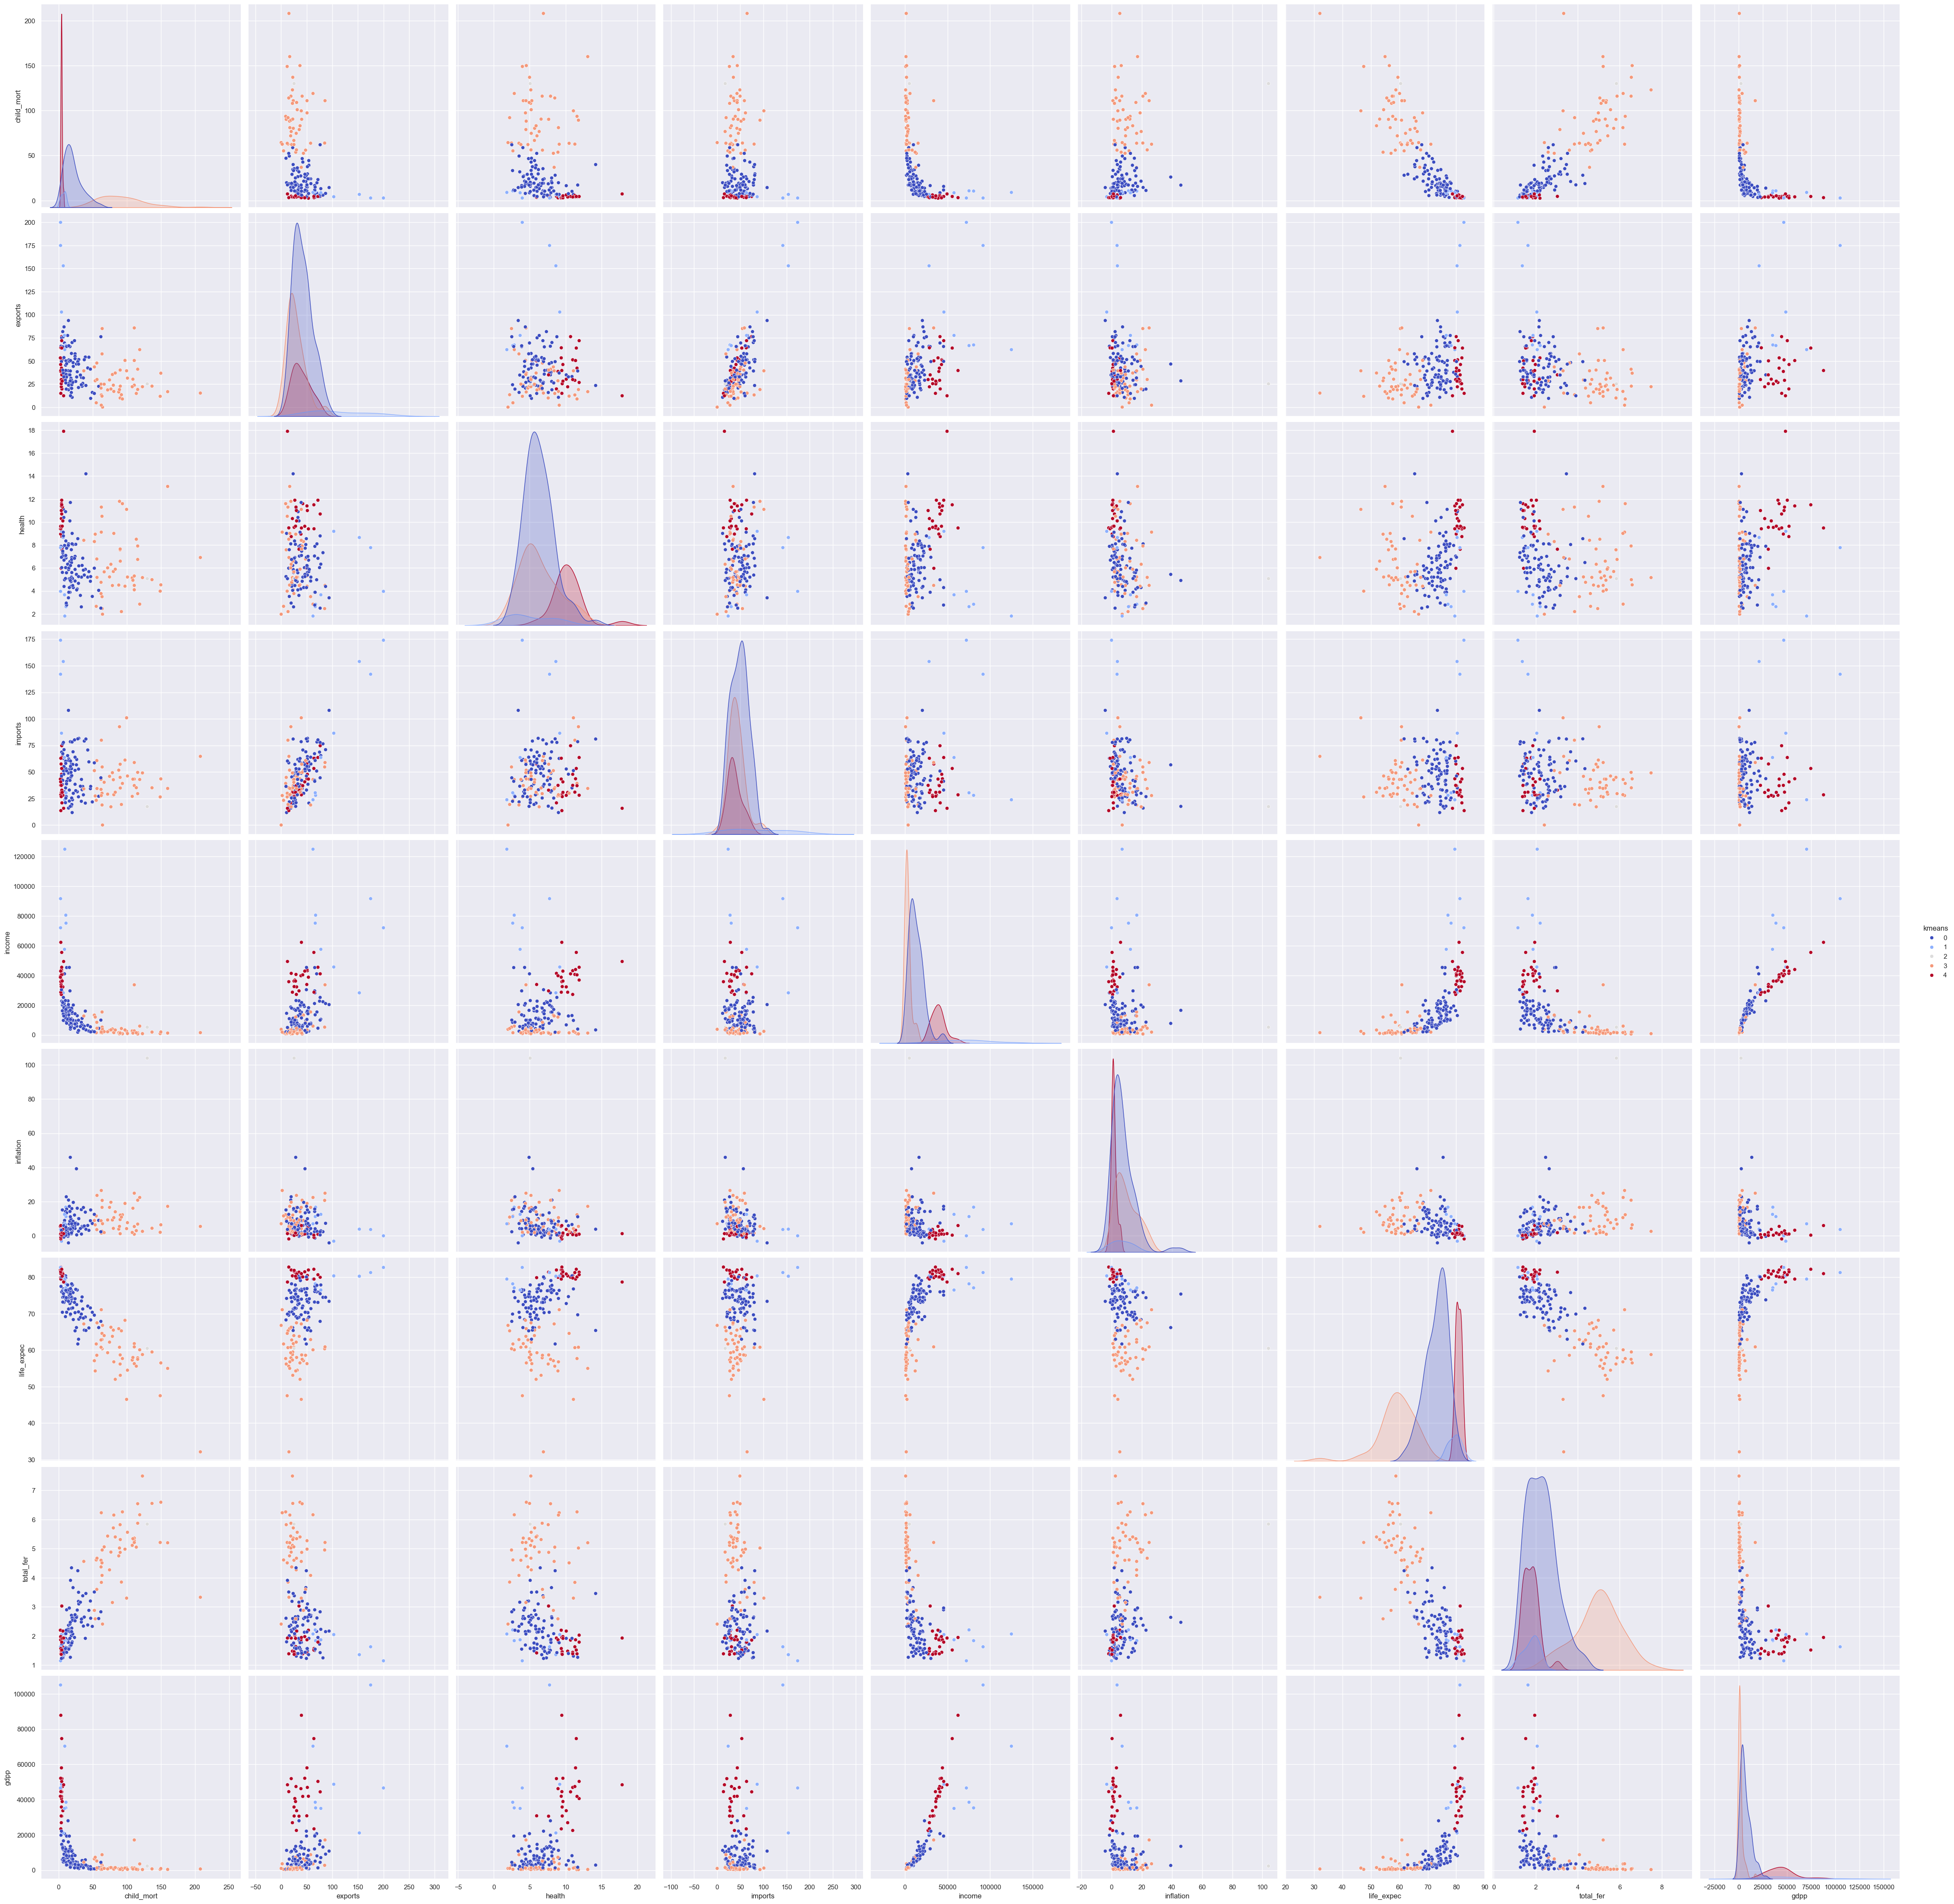

In [62]:
df_evaluation = df_country.select(
    [
        "child_mort",
        "exports",
        "health",
        "imports",
        "income",
        "inflation",
        "life_expec",
        "total_fer",
        "gdpp",
        "kmeans",
    ]
)

sns.pairplot(data=df_evaluation.to_pandas(), hue="kmeans", size=5, palette="coolwarm")

<Axes: xlabel='child_mort', ylabel='gdpp'>

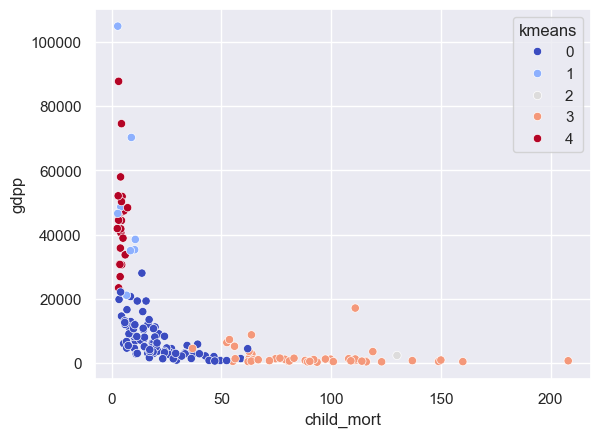

In [63]:
sns.scatterplot(data=df_evaluation, x="child_mort", y="gdpp", hue="kmeans", palette="coolwarm")

In [66]:
df_country.filter(pl.col("kmeans") == 1)

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hc_cluster,y_dbscan,dbscan_without_pca
str,f64,f64,f64,f64,i64,f64,f64,f64,i64,i32,i64,i64,i64
"""Brunei""",10.5,67.4,2.84,28.0,80600,16.7,77.1,1.84,35300,1,0,-1,-1
"""Ireland""",4.2,103.0,9.19,86.5,45700,-3.22,80.4,2.05,48700,1,0,-1,0
"""Kuwait""",10.8,66.7,2.63,30.4,75200,11.2,78.2,2.21,38500,1,0,-1,-1
"""Luxembourg""",2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,1,0,-1,-1
"""Malta""",6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,1,0,-1,-1
"""Qatar""",9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,1,0,-1,-1
"""Singapore""",2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,0,-1,-1
"""United Arab Em…",8.6,77.7,3.66,63.6,57600,12.5,76.5,1.87,35000,1,0,-1,0
